In [1]:
# vou refazer o passo a passo da aula do Diogo Cortiz, por isso irei importar as bibliotecas
# pouco a pouco, buscando aprender as tomadas de decisão e passo a passo
# para que não seja só um copia e cola.

In [2]:
# Baixando o csv com os dados para a máquina

!pip install wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=beb584b98758bef7837bd2218d524ebd3685dfb7245fbf0990dac1da2f8d6658
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2024-03-16 23:26:20--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248868 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv’

dataset_einstein.cs 100%[===================>] 243.04K  --.-KB/s    in 0.03s   

2024-03-16 23:26:20 (7.10 MB/s) - ‘dataset_einstein.csv’ saved [248868/248868]



In [3]:
# Atribuir os dados para um dataframe. Para isso, importar pandas
import pandas as pd
dados = pd.read_csv(r'/content/dataset_einstein.csv', ';')

<ipython-input-3-3d1578fad1cc>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dados = pd.read_csv(r'/content/dataset_einstein.csv', ';')


In [4]:
dados.head(15)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.36455,-0.223767,-0.286986,-1.838623
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes. 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes. 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes. 0=no)  5644 non-null   int64  
 6   Hemoglobin                                             603 non-null    float64
 7   Leukocytes                                             602 non-null    float64
 8   Basophils                                       

In [6]:
dados = dados.dropna()

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 5643
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             357 non-null    object 
 1   Patient age quantile                                   357 non-null    int64  
 2   SARS-Cov-2 exam result                                 357 non-null    object 
 3   Patient addmited to regular ward (1=yes. 0=no)         357 non-null    int64  
 4   Patient addmited to semi-intensive unit (1=yes. 0=no)  357 non-null    int64  
 5   Patient addmited to intensive care unit (1=yes. 0=no)  357 non-null    int64  
 6   Hemoglobin                                             357 non-null    float64
 7   Leukocytes                                             357 non-null    float64
 8   Basophils                                        

In [8]:
# É preciso saber se os dados estão balanceados, ou seja, se há uma boa relação entre as etiquetagens
# positivo e negativo. É interessante que seja o mais próximo de 50%-50% para que o algoritmo/modelo
# funcione da melhor forma nos dois cenários

print ('Total de registros positivos: ', dados[dados["SARS-Cov-2 exam result"]=="positive"].shape[0])
print ('Total de registros negativos: ', dados[dados["SARS-Cov-2 exam result"]=="negative"].shape[0])


Total de registros positivos:  55
Total de registros negativos:  302


In [9]:
# Usamos até agora a lib Pandas para alterar os dados, mas precisamos transformar esses dados em Array com Numpy
# para conseguir desenvolver o modelo.
import numpy as np

# Como é um modelo de classificação, primeiro vamos separar as etiquetas e atribuir à uma variável Y

Y = dados['SARS-Cov-2 exam result'].values
print (Y)




['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

In [10]:
# Após separar as etiquetas em uma variável Y, agora separamos as  o valor presente nas
# Features que vamos utilizar em uma outra variável, chamada X em formato de Array

X = dados[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']].values
# Dessa forma, entre dois colchetes, cada linha da planilha de dados vira uma lista com os valores equivalentes à linha
print (X)

[[-0.02234027 -0.09461035 -0.22376651 -0.14789495]
 [-0.774212    0.36455047 -0.22376651 -0.28698576]
 [ 0.85484386 -0.07513076  2.52536511 -0.4340246 ]
 ...
 [ 1.10546756 -0.5509882  -0.22376651  0.5614683 ]
 [-2.77920342 -1.73367476 -1.14014375  0.60915661]
 [ 0.54156393 -1.28842807 -1.14014375 -0.50357002]]


In [11]:
# Nesse momento é preciso separar o dataset em dois, treino e teste, normalmente na proporção 80% - 20%

from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [12]:
# Diferença entre Algoritmo e Modelo: Algoritmo será a "regra" que vamos utilizar, nesse caso árvore da decisão
# Já o modelo é um algoritmo já treinado e focado no caso específico.
# Primeiro iremos atribuir o algoritmo "Árvore da decisão" para uma variável

from sklearn.tree import DecisionTreeClassifier, export_graphviz

algoritmo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

modelo = algoritmo_arvore.fit(X_treino, Y_treino)

In [18]:
# Vou importar as outras libs que não importei ainda pq vão ser importantes nos próximos passos
# Mas sei que essa forma de importar não é a correta, foi só para aprender

import itertools
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image
import six

from six import StringIO

[0.13553694 0.52890209 0.18040441 0.15515656]


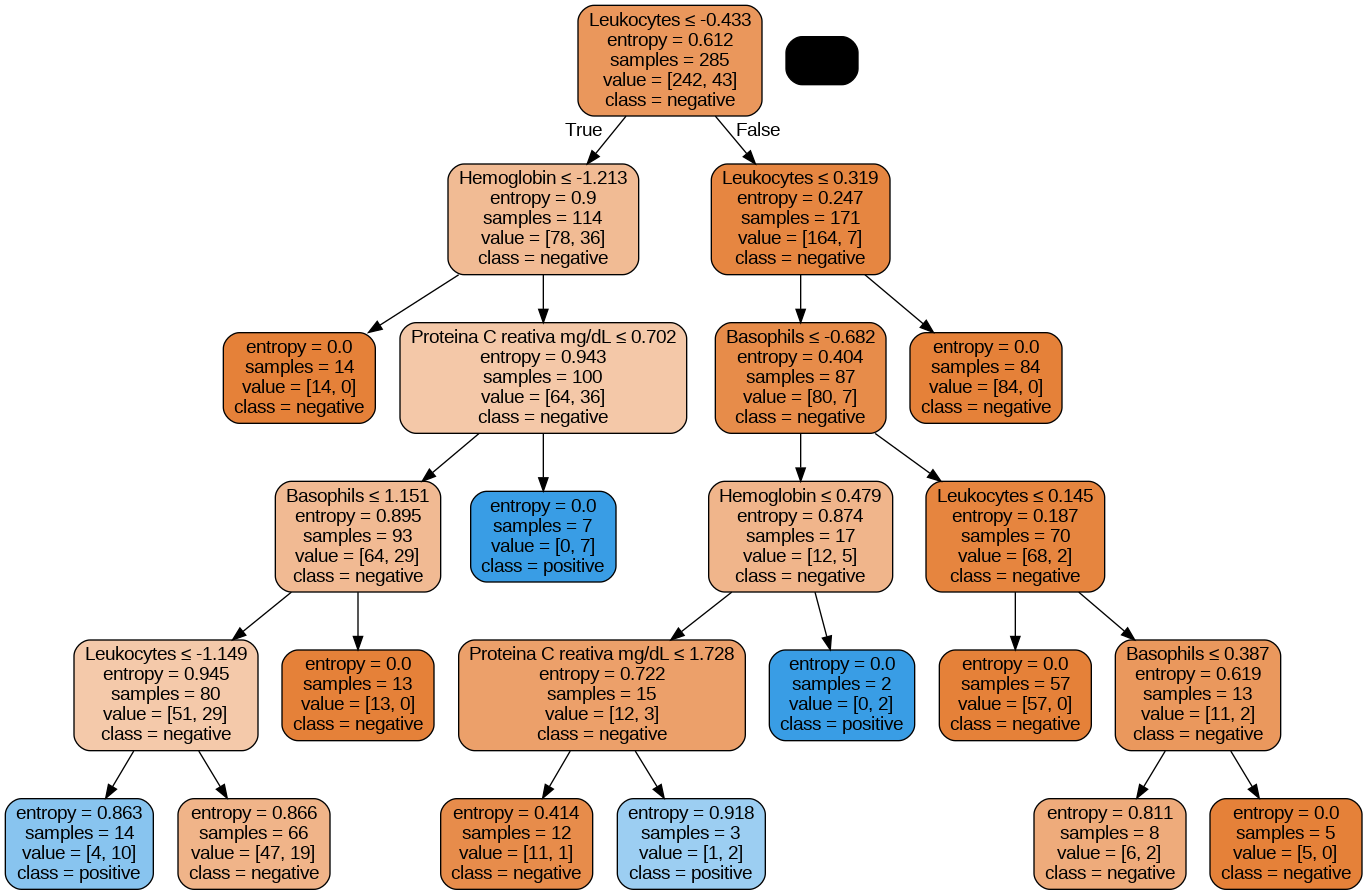

In [19]:
# Para ter a árvore de decisão impressa na tela, esse é o código:

print (modelo.feature_importances_)
nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# Montagem da imagem
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image("arvore.png")



Feature Ranking
1. Leukocytes: 0.52890
2. Basophils: 0.18040
3. Proteina C reativa mg/dL: 0.15516
4. Hemoglobin: 0.13554


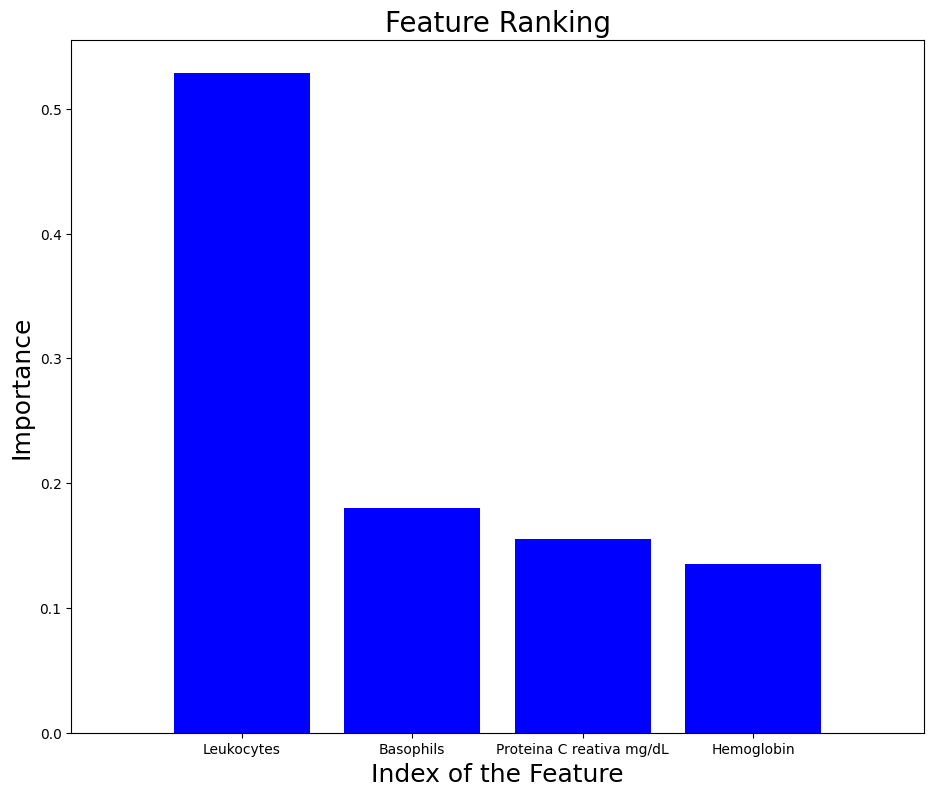

In [20]:
# Para entender sobre como foi feita, é interessante buscar quais features foram mais importantes
# As próximas 3 linhas são para descobrir os dados para montar o gráfico de importância das Features

importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
lista_indices = indices.tolist()
indices_ranqueados = list(map(lambda n: nome_features[n], lista_indices))

print ('Feature Ranking')

for f in range(X.shape[1]):
  print (f'{f+1}. {indices_ranqueados[f]}: {importances[indices[f]]:.5f}')

f, ax = plt.subplots(figsize=(11,9))
plt.title("Feature Ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
        color= 'b', align='center')
plt.xticks(range(X.shape[1]), indices_ranqueados)
plt.xlim(-1, X.shape[1])
plt.ylabel('Importance', fontsize=18)
plt.xlabel('Index of the Feature', fontsize=18)
plt.show()


In [21]:
# Chegou o momento de aplicar o modelo no dataset de teste
# O resultado será armazenado em Y_predicoes

Y_predicoes = modelo.predict(X_teste)

# Avaliação do modelo:

print (f'Acurácia da árvore: {accuracy_score(Y_teste, Y_predicoes):.3f}')
print (classification_report(Y_teste, Y_predicoes))

Acurácia da árvore: 0.847
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


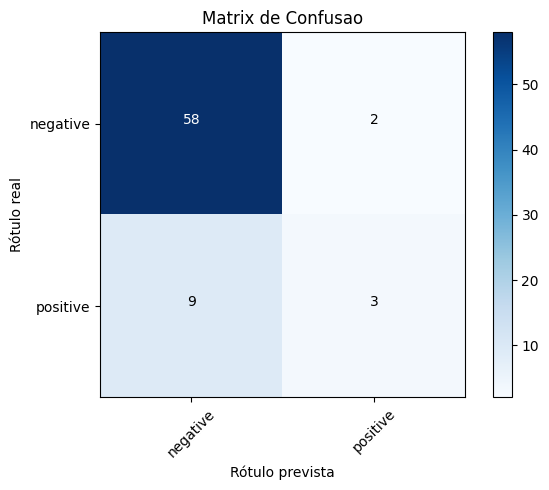

In [22]:
# passar Matriz da confusão e estudar sobre

# Essa parte abaixo não fui eu que fiz, copiei da resolução do exercício, ainda estou estudando Matriz da Confusão

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')